# **Проект спринта 8: анализ рынка общественного питания в Москве**

### Автор: Лукинова Диана
### Дата: 05.12.2025

### **1. Цель и задачи**

**Цель**: проанализировать рынок общественного питания в Москве

**Задачи**:
* предобработать данные (работа с пропусками, дубликатами)
* Проанализировать распределение заведений по категориям, по АО Москвы 
* Изучить соотношение сетевых и несетевых заведений
* Исследовать количество мест в заведениях
* Исследовать рейтинг заведений, его зависимость от других данных
* Выделить топ-15 популярных сетей заведений Москвы
* Изучить вариацию среднего чека в зависимости от района Москвы

### **2. Данные**

Данные для анализа состоят из двух датасетов

* /datasets/rest_info.csv содержит информацию о заведениях общественного питания
* /datasets/rest_price.csv содержит информацию о среднем чеке в заведениях общественного питания

#### `/datasets/rest_info.csv`
- **name** — название заведения;
- **address** — адрес заведения;
- **district** — административный район, в котором находится заведение, например Центральный административный округ;
- **category** — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- **hours** — информация о днях и часах работы;
- **rating** — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- **chain** — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
- **seats** — количество посадочных мест.

#### `/datasets/rest_price.csv`
- **price** — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- **avg_bill** — хранит среднюю стоимость заказа в виде диапазона, например:
- **middle_avg_bill** — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
- **middle_coffee_cup** — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:

### **3. Структура проекта**

* Загрузка данных и знакомство с ними
* Предобработка данных
* Исследовательский анализ данных
* Итоговый вывод и рекомендации

### **4. Загрузка данных и знакомство с ними**

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
!pip install phik
from phik import phik_matrix


[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

#info_df = pd.read_csv('rest_info.csv')
#price_df = pd.read_csv('rest_price.csv')

In [3]:
info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `/datasets/rest_info.csv` содержит 8406 строк и 9 столбцов, в которых представлена информация о заведениях общественного питания

Выводы после первичного анализа данных:
* Названия столбцов приведены к единому виду и не требуют изменения
* Пропуски встречаются только в столбцах `hours` и `seats`, однако стоит проверить остальные столбцы на наличие значений-индикаторов
* Столбцы `rating`, `seats` имеют тип float64, столбец `chain` -- int64, что соответсвует описанию данных. Однако тип данных в столбцах `seats` и `chain` можно оптимизировать, потому что мест в заведении обычно не очень много, а в столбце `chain` всего два вида значения. В остальных столбцах тип данных -- object, что соответствует описанию
* Судя по первому знакомству, значения в столбцах соответствуют своему описанию

In [5]:
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `/datasets/rest_price.csv` содержит 4058 строк и 5 столбцов, в которых представлена информация о среднем чеке в заведениях общественного питания

Выводы после первичного анализа данных:
* Названия столбцов приведены к единому виду и не требуют изменения
* Пропуски встречаются во всех столбцах, кроме `id`, в предобработке следует проанализировать, что с ними сделать. Значения в столбцах `middle_coffee_cup` и `middle_avg_bill` зависят от значений в столбце `avg_bill`, поэтому в этих столбцах больше пропусков, чем в других
* Столбцы `middle_avg_bill`, `middle_coffee_cup` имеют тип float64, остальные столбцы -- object, что соответсвует описанию данных.
* Судя по первому знакомству, значения в столбцах соответствуют своему описанию

объединим датасеты

In [7]:
df = pd.merge(info_df, price_df, on='id', how='outer')

контроль размера датасета

In [8]:
tmp = df.copy() 
len(tmp)

8406

### **5. Предобработка данных**

#### **5.1. Оптимизируем типы данных**

In [9]:
for column in ['seats', 'chain']:
    df[column] = pd.to_numeric(df[column], downcast='integer')

#### **5.2. Проверяем наличие пропусков в данных**

считаем пропуски в каждом столбце

In [10]:
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

считаем долю пропусков в каждом столбце

In [11]:

df.isna().mean()

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

Возможные причины появления пропусков в столбцах:
* Эти данные могли быть попросту не опубликованы для конкретных заведений (часы работы, количество мест, средний чек и, соответственно, категория цен)
* Данные, зависящие от других столбцов (`middle_avg_bill`, `middle_coffee_cup`), имеют пропуски, потому что указывают специфическую информацию, характерную не для всех заведений (например, цена одной чашки кофе указывается только для строк, которые начинаются со слов "Цена одной чашки капучино")

Далее проверим уникальные значения в столбцах на наличие индикаторов пропусков

In [12]:
# Проверяем уникальные значения в столбцах
for column in ['category', 'hours', 'chain', 'price', 'avg_bill']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']

Уникальные значения в столбце hours:
['Нет информации'
 'вт 08:30–17:00; ср,чт 12:00–20:30; пт 08:30–17:00; сб 09:00–16:30'
 'вт 13:00–21:00; ср 11:00–20:00; чт 13:00–21:00; пт-вс 11:00–20:00' ...
 'чт круглосуточно, перерыв 10:00–20:00; сб круглосуточно'
 'чт-вс 20:00–06:00' nan]

Уникальные значения в столбце chain:
[0 1]

Уникальные значения в столбце price:
['высокие' 'выше среднего' 'низкие' 'средние' nan]

Уникальные значения в столбце avg_bill:
['Средний счёт:100 ₽' 'Средний счёт:1000 ₽' 'Средний счёт:1000–10000 ₽'
 'Средний счёт:1000–1100 ₽' 'Средний счёт:1000–1200 ₽'
 'Средний счёт:1000–1300 ₽' 'Средний счёт:1000–1350 ₽'
 'Средний счёт:1000–1400 ₽' 'Средний счёт:1000–1500 ₽'
 'Средний счёт:1000–1600 ₽' 'Средний счёт:1000–1700 ₽'
 'Средний счёт:1000–2000 ₽' 'Средний счёт:1000–2500 ₽'
 'Средний счёт:1000–3000 ₽' 'Средний счёт:1000–5000 ₽'
 'Средний

В столбце `hours` встретился индикатор "Нет информации", заменим пропуски в этом столбце на него

In [13]:
df['hours'] = df['hours'].fillna('Нет информации')

In [14]:
len(df['hours']) #пропуски обработались

8406

Доля пропусков в остальных столбцах очень большая, мы не будем их удалять. Заменить пропуски на какое-либо значение также не получится, потому что у нас недостаточно сведений о заведениях

#### **5.3. Проверяем наличие дубликатов в данных**

In [15]:
# Проверяем полные дубликаты
df.duplicated().sum()

0

В датафрейме нет явных дубликатов, проверим на неявные

In [16]:
# Проверим, что каждая строка соответствует уникальному клиенту
df.duplicated(subset='id').sum()

0

Проверим уникальные значения в столбцах с названием и адресом заведения

In [17]:
for column in ['name', 'address']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце name:
['#КешбэкКафе' '+39 Pizzeria Mozzarella bar' '1 Этаж' ... 'Ясно' 'Яуза'
 'ночной Баку']

Уникальные значения в столбце address:
['Москва, 1-й Автозаводский проезд, 5'
 'Москва, 1-й Балтийский переулок, 3/25'
 'Москва, 1-й Варшавский проезд, 1Ас9' ...
 'Москва, шоссе Энтузиастов, 86А, корп. 3' 'Москва, шоссе Энтузиастов, с2'
 'Москва, № 7']



In [18]:
for column in ['name', 'address']:
    print(f'Количество уникальных значений в столбце {column}:')
    print(len(df[column].sort_values().unique()))
    print()

Количество уникальных значений в столбце name:
5614

Количество уникальных значений в столбце address:
5753



In [19]:
len(df['id'])

8406

Мы видим, что нескольким айди может соответствовать одно и то же название заведения, а также один и тот же адресс. Однако скорее всего это не ошибка, потому что по одному адресу может быть несколько заведений, а несколько заведений с одинаковым названием могут располагаться на разных адресах

In [20]:
# Приведем столбец с названиями к нижнему регистру:
df['name'] = df['name'].str.lower()
df[df[['name', 'address']].duplicated()]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,NaN,NaN,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","Москва, проспект Мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,NaN,NaN,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"Москва, Ярцевская улица, 19",Западный административный округ,Нет информации,4.1,0,276.0,NaN,NaN,NaN,NaN


здесь обнаружились дубликаты, удалим их

In [21]:
df = df.drop_duplicates(subset=['name', 'address'], keep='first')

In [22]:
df[df[['name', 'address']].duplicated()]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup


In [23]:
df.shape[0] #удалено три строки

8403

#### **5.4. Добавляем новый столбец**

In [24]:
def create_is_24_7(x):
    if 'ежедневно, круглосуточно' in x:
        return True
    else:
        return False

df['is_24_7'] = df['hours'].apply(create_is_24_7)

In [25]:
df['is_24_7'].sum()

730

730 заведений, работающих круглосуточно каждый день

#### **5.5. Промежуточные выводы после предобработки**

На этом предобработка завершена. На этапе предобработки были выполнены следующие действия:
* Было проверено, что данные имеют корректные типы, столобцы - корректные названия
* Изучены пропуски в данных: пропуски были обнаружены в столбцах `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`
* В столбце `hours` пропуски были заменены на значение-индикатор "Нет информации", в остальных столбцах пропуски оставили, как есть
* Данные проверены на явные и неявные дубликаты - их не было обнаружено

### **6. Исследовательский анализ данных**

#### Категории заведений

Выведем уникальные названия заведений

In [26]:
df['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

Количество заведений каждой категории

In [27]:
df.groupby('category')['name'].count().sort_values(ascending = False)

category
кафе               2377
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: name, dtype: int64

In [28]:
# доля каждой категории
df.groupby('category')['name'].count().sort_values(ascending = False) / df.shape[0]

category
кафе               0.282875
ресторан           0.243008
кофейня            0.168154
бар,паб            0.090920
пиццерия           0.075330
быстрое питание    0.071760
столовая           0.037487
булочная           0.030465
Name: name, dtype: float64

<Axes: title={'center': 'Количество заведений по категориям'}, xlabel='Категория заведения', ylabel='Количество заведений'>

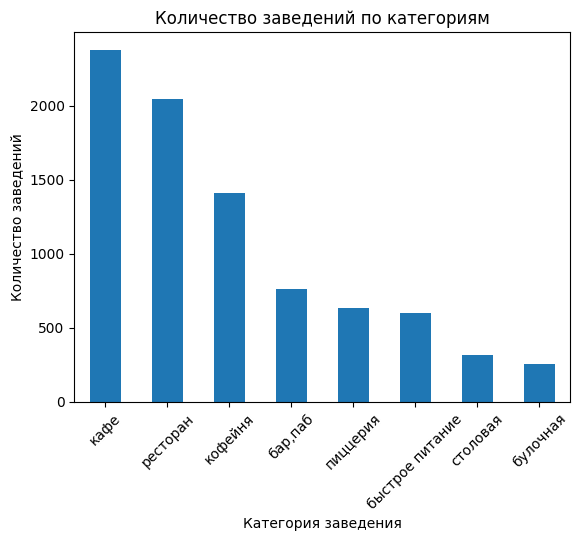

In [29]:
df['category'].value_counts().plot(kind='bar', title='Количество заведений по категориям',
                                    xlabel='Категория заведения', 
                                    ylabel='Количество заведений',
                                    rot=45)


В Москве больше всего кафе (28 %) и ресторанов (24 %). Чуть меньше кофеен -- 17 %

Баров/пабов в Москве около 9%, пиццерий и заведений быстрого питания примерно по 7%

Самые непопулярные заведения -- столовые (3.7 %) и булочные (3 %).

#### Административные районы Москвы

In [30]:
# выведем уникальные названия районов
df['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

Посчитаем количество заведений в каждом районе

In [31]:
df.groupby('district')['name'].count().sort_values(ascending = False)

district
Центральный административный округ         2242
Северный административный округ             899
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: name, dtype: int64

<Axes: title={'center': 'Количество заведений по районам'}, xlabel='Район', ylabel='Количество заведений'>

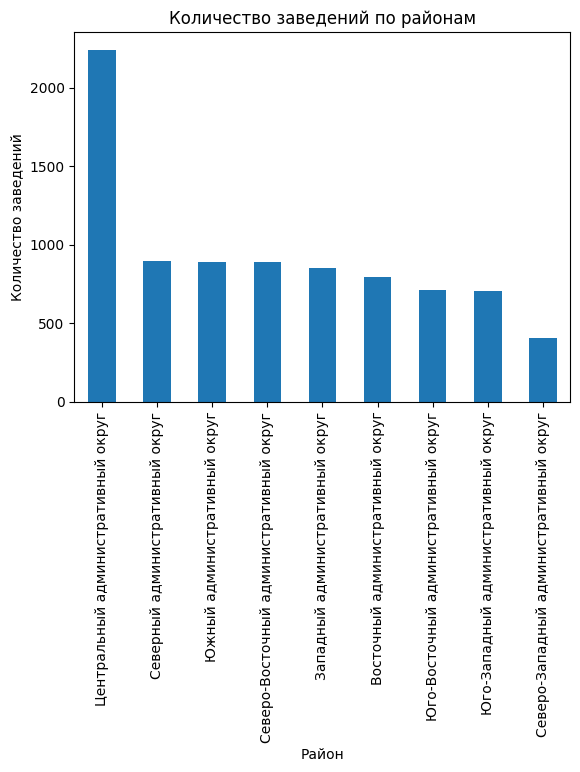

In [32]:
df['district'].value_counts().plot(kind='bar', title='Количество заведений по районам',
                                    xlabel='Район', 
                                    ylabel='Количество заведений',
                                    rot=90)

Больше всего заведений находится в Центральном административном округе (2242 заведения)

Меньше всего заведений в северо-западном административном округе (409)

В остальных районах количество заведений в диапазоне 709 - 899.

*Распределение заведений каждой категории в Центральном административном округе Москвы*

In [33]:
df[df['district'] == 'Центральный административный округ'].groupby('category')['name'].count().sort_values(ascending = False)

category
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: name, dtype: int64

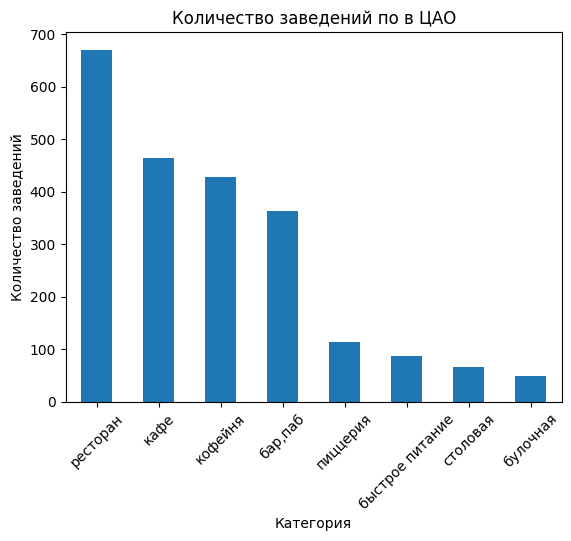

In [34]:
df[df['district'] == 'Центральный административный округ']['category'].value_counts().plot(kind='bar', title='Количество заведений по в ЦАО',
                                    xlabel='Категория', 
                                    ylabel='Количество заведений',
                                    rot=45)
plt.show()

В центральном административном округе больше всего ресторанов (670) и кафе (464), также распространены кофейни (428) и бары/пабы (364).

Остальные заведения (пиццерии, быстрое питание, столовые и булочные) сильно менее распространены в этом районе (в диапазоне от 50 до 113)

#### Соотношение сетевых и несетевых заведений

Соотношение по всем данным

In [35]:
# Соотношение по всем данным
print ('Количество сетевых заведений:', df[df['chain']==1]['name'].count())
print ('Количество несетевых заведений:', df[df['chain']==0]['name'].count())

Количество сетевых заведений: 3203
Количество несетевых заведений: 5200


По всем категориям больше несетевых заведений

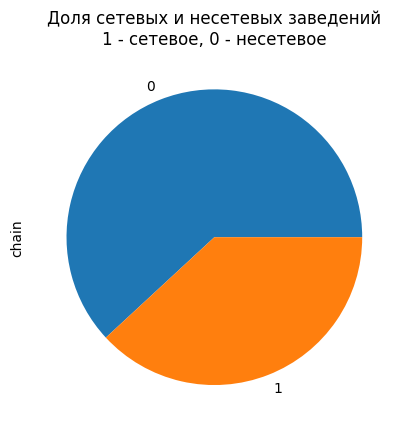

In [36]:

df['chain'].value_counts(normalize=True).plot(kind='pie', title='Доля сетевых и несетевых заведений\n1 - сетевое, 0 - несетевое', 
                                    rot=0)
plt.grid()
plt.show()

По всем категориям заведений несетевых заведений чуть больше 60%, а сетевых - чуть меньше 40%

Соотношение в разрезе категорий

In [37]:
grouped = df.groupby('category')['chain'].value_counts().unstack(fill_value=0)
grouped

chain,0,1
category,,
"бар,паб",596,168
булочная,99,157
быстрое питание,371,232
кафе,1598,779
кофейня,693,720
пиццерия,303,330
ресторан,1313,729
столовая,227,88


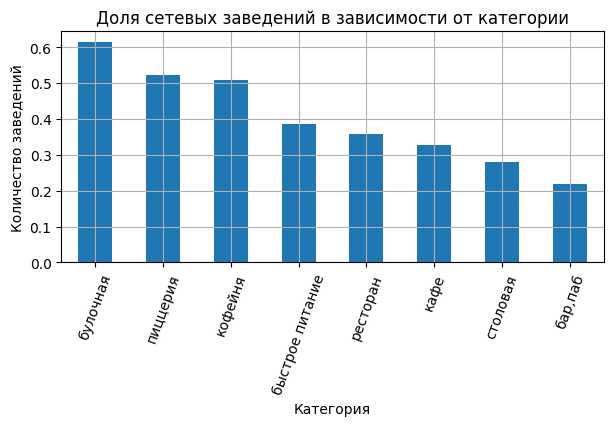

In [38]:

grouped = df.groupby('category')['chain'].agg(['count', 'sum'])
grouped['chain_share'] = grouped['sum'] / grouped['count']
grouped['chain_share'].sort_values(ascending=False).plot(kind='bar',
               title=f'Доля сетевых заведений в зависимости от категории',
               ylabel='Количество заведений',
               xlabel='Категория',
               rot=70,
               figsize=(7, 3))
plt.grid()
plt.show()

По графику видно, что сетевыми чаще всего являются булочные, пиццерии и кофейни

Меньше всего сетевых заведений среди пабов/баров и столовых

#### Количество посадочных мест в заведениях

In [39]:
df['seats'].describe()

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Видно, что среднее значение сильно смещено вправо относительно медианы, в данных могут быть выбросы (хотя возможно большое заведение с 1288 местами действительно есть, у нас недостаточно информации, чтобы это проверить)

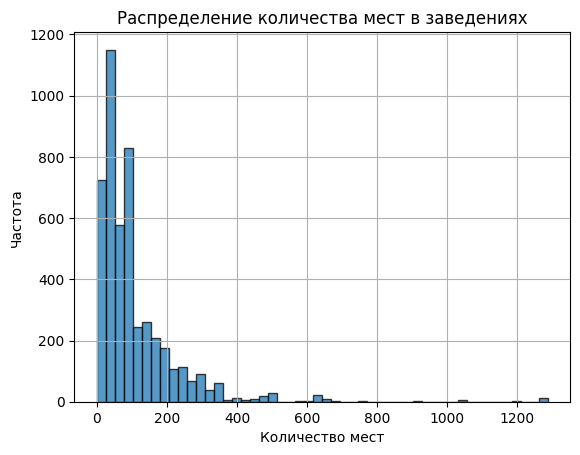

In [40]:
# построим гистограмму
df['seats'].plot(
                kind='hist', 
                alpha=0.75,
                bins=50,
                edgecolor='black',
                rot=0, 
                title='Распределение количества мест в заведениях',

)

plt.xlabel('Количество мест')
plt.ylabel('Частота')
plt.grid()
plt.show()

Действительно, распределение нельзя назвать нормальным, данные смещены вправо

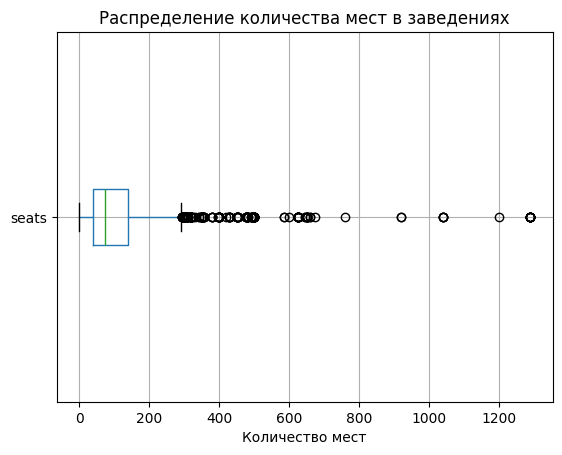

In [41]:
df.sort_values(by='seats').boxplot(column='seats', vert=False) 
plt.title('Распределение количества мест в заведениях')
plt.xlabel('Количество мест')
plt.show()

Выбросы могут объясняться тем, что заведений на большое количество человек очень мало, а основная масса заведений готова принимать от 0 до 100 гостей

*Наиболее типичное количество мест для каждой категории заведения*

In [42]:
df.groupby('category')['seats'].median().sort_values(ascending=False)

category
ресторан           86.0
бар,паб            82.0
кофейня            80.0
столовая           75.5
быстрое питание    65.0
кафе               60.0
пиццерия           55.0
булочная           50.0
Name: seats, dtype: float64

Больше всего мест в ресторанах, барах/пабах и кофейнях (86, 82, 80)

Меньше всего мест в пиццериях и булочных (55 и 50)

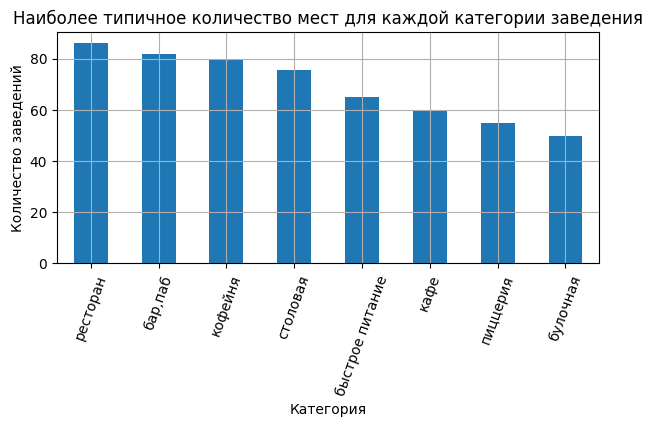

In [43]:
grouped = df.groupby('category')['seats'].median()
grouped.sort_values(ascending=False).plot(kind='bar',
               title='Наиболее типичное количество мест для каждой категории заведения',
               ylabel='Количество заведений',
               xlabel='Категория',
               rot=70,
               figsize=(7, 3))
plt.grid()
plt.show()

#### Рейтинг заведений

In [44]:
df['rating'].mean()

4.229894085445673

In [45]:
df.groupby ('category')['rating'].mean().reset_index()


,category,rating
0,"бар,паб",4.387696
1,булочная,4.268359
2,быстрое питание,4.050249
3,кафе,4.123896
4,кофейня,4.277282
5,пиццерия,4.301264
6,ресторан,4.290402
7,столовая,4.211429


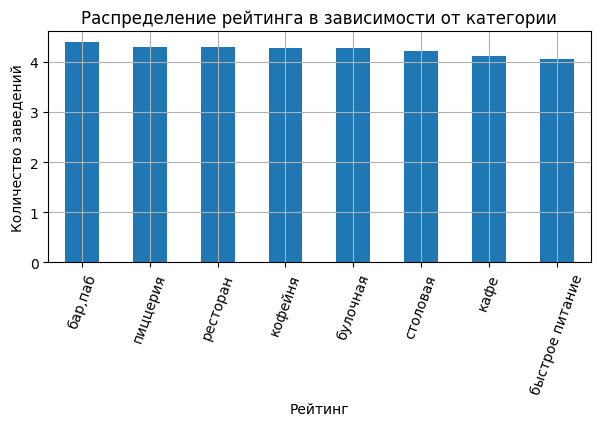

In [46]:
grouped = df.groupby('category')['rating'].mean()
grouped.sort_values(ascending=False).plot(kind='bar', 
               title='Распределение рейтинга в зависимости от категории',
               ylabel='Количество заведений',
               xlabel='Рейтинг',
               rot=70,
               figsize=(7, 3))
plt.grid()
plt.show()

Средние рейтинги практичеки не отличаются для разных категорий общепита, самым низким (но всё ещё выше четырёх) является категория быстрого питания 

#### Корреляция с рейтингами заведений

In [47]:
correlation_matrix = df[['category', 'district', 'chain', 'seats', 'price',
                         'is_24_7', 'rating']].phik_matrix()

correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['chain', 'seats', 'rating']


,rating
price,0.220295
district,0.200701
category,0.189904
is_24_7,0.150210
chain,0.108060
seats,0.000000


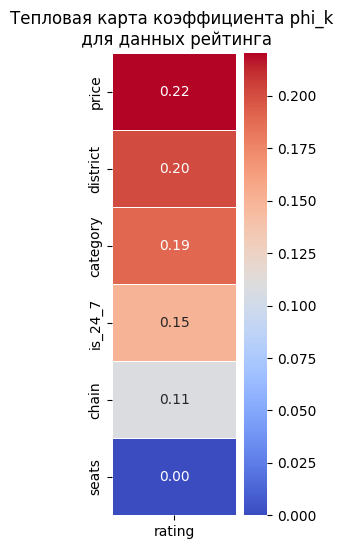

In [48]:
plt.figure(figsize=(2, 6))
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm',
            linewidths=0.5
           )
plt.title('Тепловая карта коэффициента phi_k \n для данных рейтинга')
plt.show()

Наиболее сильная корреляция с признаком price (0.22)

In [49]:
# считаем среднее
df.groupby('price')['rating'].mean().sort_values(ascending=False)

price
высокие          4.436611
выше среднего    4.386348
средние          4.297874
низкие           4.173077
Name: rating, dtype: float64

In [50]:
# считаем медиану
df.groupby('price')['rating'].median().sort_values(ascending=False)

price
высокие          4.4
выше среднего    4.4
средние          4.3
низкие           4.2
Name: rating, dtype: float64

Судя по данным медианы и среднего значения рейтинга по категориям заведения с высоким средним чеком оценивают лучше (в среднем 4.44), а с низким - хуже (в среднем 4.17)

#### топ-15 популярных сетей в Москве

In [51]:
top15 = df[df['chain'] == 1].groupby('name').agg(count=('name', 'size'), mean_rating=('rating', 'mean'), category=('category', 'first')).reset_index()
top15 = top15.sort_values('count', ascending=False).head(15)
top15

,name,count,mean_rating,category
729,шоколадница,120,4.177500,кофейня
335,домино'с пицца,76,4.169737,пиццерия
331,додо пицца,74,4.286486,пиццерия
146,one price coffee,71,4.064789,кофейня
742,яндекс лавка,69,3.872464,ресторан
58,cofix,65,4.075385,кофейня
168,prime,50,4.116000,ресторан
664,хинкальная,44,4.322727,быстрое питание
409,кофепорт,42,4.147619,кофейня
418,кулинарная лавка братьев караваевых,39,4.394872,кафе


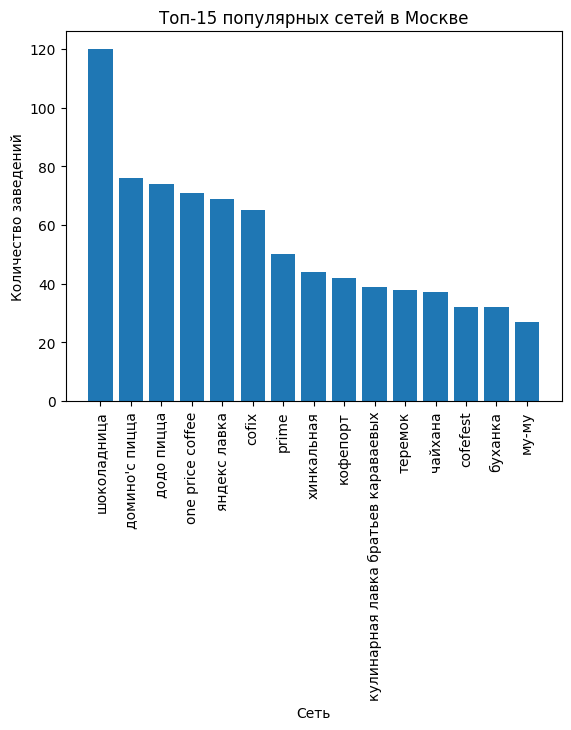

In [52]:
plt.bar(top15['name'], top15['count'])
plt.xticks(rotation=90)
plt.title('Топ-15 популярных сетей в Москве')
plt.xlabel('Сеть')
plt.ylabel('Количество заведений')
plt.show()

Самой популярной сетью в Москве является Шоколадница, у которой 120 заведений

In [53]:

top15[['name', 'mean_rating']].sort_values('mean_rating', ascending=False)

,name,mean_rating
267,буханка,4.396875
418,кулинарная лавка братьев караваевых,4.394872
664,хинкальная,4.322727
331,додо пицца,4.286486
477,му-му,4.229630
729,шоколадница,4.177500
335,домино'с пицца,4.169737
409,кофепорт,4.147619
628,теремок,4.123684
168,prime,4.116000


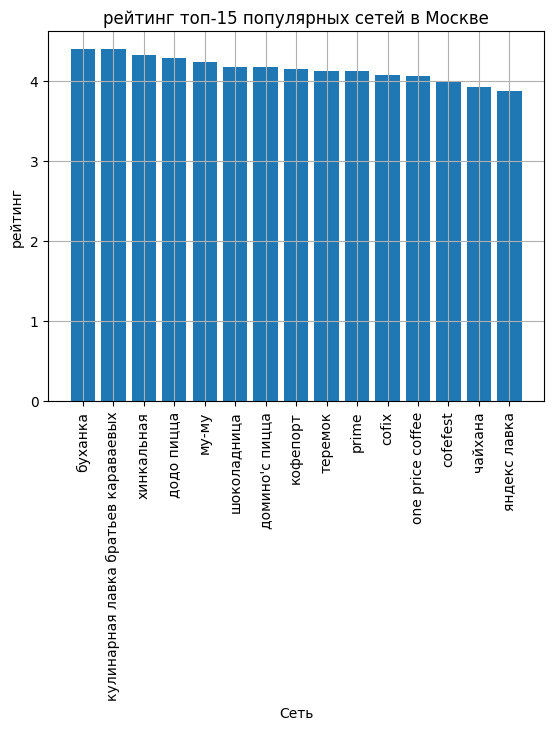

In [54]:

top15 = top15.sort_values(by='mean_rating', ascending=False)
plt.bar(top15['name'], top15['mean_rating'])
plt.xticks(rotation=90)
plt.title('рейтинг топ-15 популярных сетей в Москве')
plt.xlabel('Сеть')
plt.ylabel('рейтинг')
plt.grid()
plt.show()

Рейтинг заведений в целом не сильно различается

Рейтинг заведений "буханка" и "кулинарная лавка братьев караваевых" самый высокий (4.4). Рейтинг чайханы и яндекс лавки самый низкий (примерно 3.9)

#### Вариация среднего чека заведения в зависимости от района Москвы

In [55]:
district_avg_bill = df.groupby ('district')['middle_avg_bill'].median().reset_index().sort_values(by='middle_avg_bill', ascending = False)
district_avg_bill

,district,middle_avg_bill
1,Западный административный округ,1000.0
5,Центральный административный округ,1000.0
4,Северо-Западный административный округ,700.0
2,Северный административный округ,650.0
7,Юго-Западный административный округ,600.0
0,Восточный административный округ,575.0
3,Северо-Восточный административный округ,500.0
8,Южный административный округ,500.0
6,Юго-Восточный административный округ,450.0


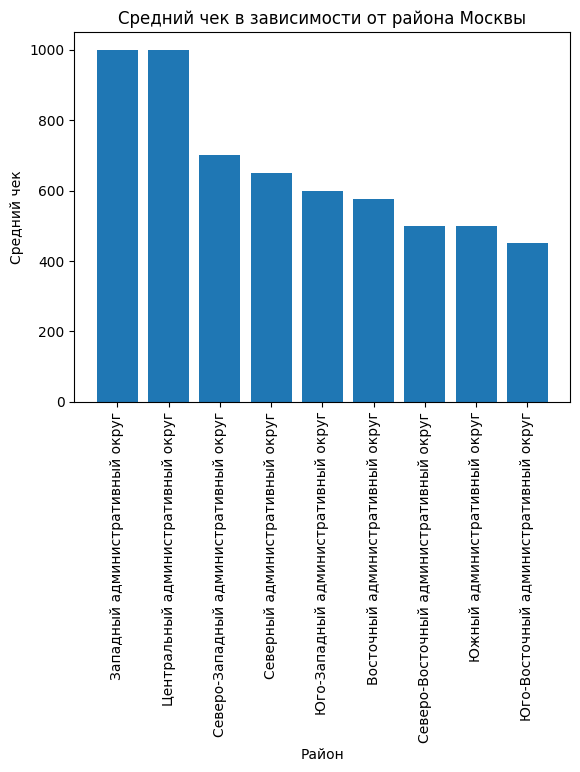

In [56]:
plt.bar(district_avg_bill['district'], district_avg_bill['middle_avg_bill'])
plt.xticks(rotation=90)
plt.title('Средний чек в зависимости от района Москвы')
plt.xlabel('Район')
plt.ylabel('Средний чек')
plt.show()

Самый высокий средний чек в заведениях центрального административного округа и западного административного округа, то есть удалённость от центра снижает средний чек (кроме западного АО)

### **7. Итоговый вывод и рекомендации**

##### Выводы
В ходе исследования был проведен всесторонний анализ рынка общественного питания Москвы на основе двух датасетов: rest_info.csv (8406 заведений) и rest_price.csv (4058 заведений). После объединения и предобработки данных (устранение дубликатов, обработка пропусков, оптимизация типов) был выполнен исследовательский анализ, включающий изучение распределения заведений по категориям и районам, анализ формата (сетевые/несетевые), оценку вместимости, рейтингов и ценовой политики.

Больше всего в Москве кафе (28%) и ресторанов (24%), что говорит о высокой доле заведений средней ценовой категории.

Центральный административный округ лидирует (2242 заведения), что логично из-за высокой проходимости и туристической привлекательности.

Несетевые заведения преобладают (71.6%)

Медиана количества посадочных мест — 75 места, но распределение неравномерное: есть как маленькие заведения (вообще без посадочных мест), так и крупные (свыше 100 мест).

Средний рейтинг заведений -- 4.22; сильной зависимости рейтинга от категории заведения не было обнаружено. Рейтинг показывает небольшую корреляцию с категорией цены (заведения с высокой ценой оценивают лучше, с низкой - хуже)

Самой популярной сетью Москвы является Шоколадница (120 заведений)

Самый высокий средний чек в ЦАО и Западном АО Москвы (1000 рублей)

##### Рекомендации

На основе проведённого анализа рынка общественного питания Москвы заказчику можно рекомендовать при открытии нового заведения сосредоточиться на форматах кафе, ресторан, кофейня как наиболее популярных, при этом для снижения конкурентного давления стоит рассмотреть локации в менее насыщенных округах, таких как Северо-Западный или Юго-Западный. При планировании бизнеса важно ориентироваться на среднюю ценовую категорию и оптимальную вместимость около 50-75 мест